## Resumo:

É possível notar uma queda na cobertura vacinal em 2016 e novamente em 2019. Trabalhei algumas hipóteses para buscar entender o que aconteceu nos dois períodos, algumas consegui refutar ou comprovar e outras nem tanto. Seguem:

###Hipótese 1: A assistência do governo caiu.
É possível notar que as quedas aconteceram no Brasil todo e, portanto, pode ter sido uma queda na assistência do governo quanto as vacinas. O TABNET, infelizmente, não disponibiliza os dados financeiros desprendidos para o SUS após 2006, portanto não pude ir para esse lado.
Contudo, encontrei o número de clínicas por região e, como podemos ver no gráfico abaixo, o número cresceu ao longo dos anos. Isso mostra que provavelmente não foi isso que causou a queda da cobertura vacinal nos períodos.

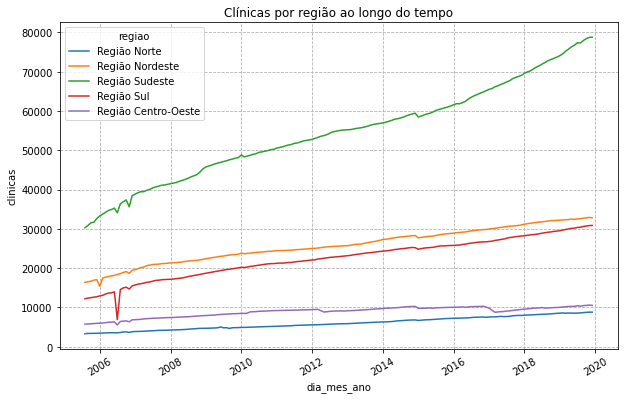

In [52]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto, x='dia_mes_ano', y='clinicas', hue='regiao')
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.title('Clínicas por região ao longo do tempo')
plt.show()

###Hipótese 2: As redes sociais e o movimento ativax no Brasil.
Segundo [esse estudo](https://sbim.org.br/images/files/po-avaaz-relatorio-antivacina.pdf), as redes sociais são fortes aliadas ao movimento anti-vacina. Tentei procurar dados sobre acesso à internet por domicílio no Braisl mas não encontrei, tentei buscar por tweets no período mas não obtive a liberação da API a tempo de enviar esse trabalho (pretendo atualizar essa informação quando receber esse acesso).  
Ao obter o acesso da API do Twitter, pretendo buscar por palavras-chave específicas para observar picos ou quedas nos períodos de 2016 ou 2015, e isso pode ser correlacionado ao baixo número de cobertura vacinal.

###Hipótese 3: As pessoas não sabem mais a importância de se vacinar.
Segundo [essa matéria](https://www.conass.org.br/consensus/queda-da-imunizacao-brasil/), os pais dessa geração não sabem a importância da vacinação por conta de não terem convivido com as doenças para as quais foram vacinados. Para validar essa hipótese, busquei dados de investimento em publicidade do Ministério da Saúde, mas não encontrei esses dados e, portanto, não pude comprovar essa informação.

###Anotações:
Até agora descobri o seguinte:
- Por algum motivo, o número a cobertura vacinal caiu em 2016 (forte queda), subiu um pouco em 2017, se manteve em 2018 mas voltou a cair em 2019. Tenho algumas informações que achei sobre isso:
  - Em 2016 o Ministério da Saúde fez uma campanha de vacinação em abril, e por ter tido um resultado ruim fez uma nova campanha em setembro. Isso pode ter algo a ver?
  - 2016 (agosto) foi o último ano do mandato do PT, há correlação entre investimento em campanhas de saúde e os mandatos que vieram a seguir?
  - Como podemos ver em alguns gráficos abaixo, a CV se comporta diferente nas regiões, mas a queda afetou todas por igual. Seja o que for, afetou o Brasil todo.
  - A queda *não* foi causada por infraestrutura, podemos ver abaixo que a infraestrutura cresceu em todas as regiões e 2016 não houve alteração nisso.

Estou trabalhando com as seguintes hipóteses:
- Segundo [essa matéria do CONASS](https://www.conass.org.br/consensus/queda-da-imunizacao-brasil/), um dos possíveis motivos para a não vacinação é porque a atual geração de pais tomou as vacinas e não conviveu com as doenças - logo não julgando necessário vacinar os filhos.
  - Essa hipótese poderia ser comprovada buscando informações sobre as campanhas de vacinação dos anos seguintes. Se feitas da maneira correta, poderiam mudar essa mentalidade.
- Segundo [esse estudo da SBIm e Avaaz](https://sbim.org.br/images/files/po-avaaz-relatorio-antivacina.pdf), as redes sociais são as grandes culpadas pelo crescimento do **movimento anti-vacina** no Brasil, e isso poderia ter afetado as quedas dos números a partir de 2016. Tenho algumas hipóteses que poderiam ajudar nisso:
  - Buscando o número de domicílios com acesso a internet por ano e tentando correlacionar isso com a queda de CV poderia ser uma maneira, mas não achei nenhum dado sólido sobre o assunto. Encontrei, contudo, [um gráfico](https://exame.com/brasil/apesar-de-expansao-acesso-a-internet-no-brasil-ainda-e-baixo/) que mostra que em 2015 o crescimento dos smartphones sobre os computadores estava em voga.
  - Percebi que algumas vacinas, como a poliomielite, começaram a ter queda em 2014. Será que algumas vacinas seletivas começaram esse movimento - por serem mais conhecidas, como a do "Zé Gotinha"? Importante plotar o dado dos imunos por ano/mês para observar isso.
- O número de clínicas públicas para vacinação caiu ao longo dos anos. REFUTADA, vemos que o número de clínicas vem crescendo ao longo dos anos e 2016 não foi nem o ano de menor crescimento (exceção da região centro-oeste, onde o número mostrou queda entre 2016 e 2018, mas se recuperou em 2019).
- O investimento em saúde do gov federal sofreu queda em algum período?

## Análise dos dados:

Inicie aqui o desenvolvimento do seu projeto, não esqueça de adicionar textos curtos e objetivos para que os avaliadores entendam sua linha de raciocínio e as conclusões que você está chegando crie uma narrativa convincente e coerênte aos dados analisados.

#Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Bases de dados
Glossário geral:
- Cobertura Vacinal: % de pessoas com vacinação completa dentro do público geral do imunizante;
- Abandono: Pessoas que começaram um tratamento imunizante mas não terminaram;
- D(1): Pessoas que começaram um tratamento imunizante;
- DN: Pessoas que terminaram um tratemento imunizante.

Bases:
- cobertura_uf: Cobertura Vacinal por Unidade da Federação por Ano de 1994 a 2019
- cobertura_uf_regiao: Cobertura Vacinal por região do Br por ano de 1994 a 2019

##Importando os dados

##Cobertura Vacinal por Unidade da Federação por Ano de 1994 a 2019
Perguntas:
- O que causa o comportamento de queda em todos os estados (exceto o DF) em 2016, depois o pico e a nova queda até 2020?
- Por que o centro-oeste foi, aparentemente, a região que menos caiu? Principalmente o DF.

In [3]:
cobertura_uf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 2 - Dados SUS/Desafio final/Coberturas Vacinais por Ano segundo RegiãoUnidade da Federação - 94 19.csv', encoding='ISO-8859-1',
                           skiprows=3,sep = ';', skipfooter=20,
                           thousands='.', decimal=',')
cobertura_uf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região/Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Região Norte,31.03,41.67,55.20,68.57,73.28,81.34,75.81,80.97,78.91,75.09,86.68,82.36,81.57,83.97,80.79,82.19,78.08,83.91,78.21,68.12,76.25,83.05,48.22,64.34,66.24,44.55,73.56
1,.. Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44,79.88
2,.. Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44,69.26
3,.. Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97,69.65
4,.. Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04,75.68


In [4]:
cobertura_uf.tail()

,Região/Unidade da Federação,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
27,Região Centro-Oeste,25.84,45.10,52.54,69.92,76.53,87.47,81.77,82.90,79.67,76.82,85.63,79.80,80.10,83.00,78.88,81.48,76.22,87.00,78.55,80.09,92.76,94.42,60.87,74.58,75.39,48.31,77.13
28,.. Mato Grosso do Sul,NaN,NaN,39.02,70.62,75.01,92.05,85.08,88.66,80.84,77.14,75.55,75.05,76.70,78.40,74.89,78.53,75.77,89.37,83.46,81.81,110.11,113.07,63.55,78.81,83.52,52.21,79.69
29,.. Mato Grosso,31.76,37.67,37.44,74.22,78.08,84.87,84.34,85.97,81.93,77.24,82.44,81.55,79.43,82.68,78.12,79.38,73.54,87.40,81.37,75.04,92.61,100.32,58.32,74.28,76.70,46.38,76.12
30,.. Goiás,22.37,69.81,66.93,70.07,73.23,87.36,82.76,83.87,82.66,79.45,92.38,81.91,81.78,84.69,80.21,80.41,76.25,96.24,82.52,79.36,86.63,93.55,53.60,73.25,71.85,47.04,77.66
31,.. Distrito Federal,NaN,0.34,55.99,64.17,84.43,86.24,73.49,71.77,69.15,70.10,84.50,77.52,80.50,84.21,80.92,90.75,80.07,67.70,64.84,85.83,89.33,71.55,75.28,73.82,73.85,49.58,74.74


In [5]:
cobertura_uf = cobertura_uf.drop('Total', axis=1)

Agora preciso separar os valores de UF dos valores região que estão no DataFrame

In [6]:
cobertura_uf_regiao = cobertura_uf[cobertura_uf['Região/Unidade da Federação'].str.contains('Região')].rename(columns={'Região/Unidade da Federação' : 'regiao'})
cobertura_uf_regiao = cobertura_uf_regiao.set_index('regiao', drop=True)
cobertura_uf_regiao

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,31.03,41.67,55.20,68.57,73.28,81.34,75.81,80.97,78.91,75.09,86.68,82.36,81.57,83.97,80.79,82.19,78.08,83.91,78.21,68.12,76.25,83.05,48.22,64.34,66.24,44.55
Região Nordeste,40.52,43.78,50.91,65.71,66.45,84.10,75.42,79.57,77.12,73.92,84.45,78.99,78.06,79.54,75.62,77.68,76.58,84.55,76.04,71.91,85.66,95.40,47.96,64.89,68.81,42.69
Região Sudeste,55.22,46.43,44.66,70.58,74.42,91.64,76.98,79.84,74.23,71.12,75.47,74.55,73.20,72.89,71.04,73.72,72.39,85.50,77.94,73.82,87.97,98.51,49.04,70.00,72.55,43.88
Região Sul,51.60,51.24,53.84,71.50,65.09,80.95,75.31,78.24,75.44,72.82,75.86,72.40,72.20,72.97,70.99,73.38,71.91,86.62,76.98,75.01,87.04,94.24,55.60,75.37,79.44,56.37
Região Centro-Oeste,25.84,45.10,52.54,69.92,76.53,87.47,81.77,82.90,79.67,76.82,85.63,79.80,80.10,83.00,78.88,81.48,76.22,87.00,78.55,80.09,92.76,94.42,60.87,74.58,75.39,48.31


In [7]:
cobertura_uf = cobertura_uf[~cobertura_uf['Região/Unidade da Federação'].str.contains('Região')].rename(columns={'Região/Unidade da Federação' : 'uf'})
cobertura_uf = cobertura_uf.set_index('uf', drop=True)
cobertura_uf.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,,,,,,,,,,,,,,,,,
.. Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
.. Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
.. Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
.. Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
.. Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


In [8]:
cobertura_uf.index = cobertura_uf.index.str[3:]
cobertura_uf.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,42.76,50.80,76.05,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,86.21,82.39,83.87,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
Acre,20.53,46.61,36.59,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,80.54,75.04,79.18,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
Amazonas,20.15,35.82,49.88,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,78.84,76.40,78.63,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
Roraima,64.06,88.84,89.18,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,76.90,71.13,80.21,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
Pará,32.44,40.11,51.26,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,87.87,84.70,84.02,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


In [9]:
cobertura_uf.rename(index={'Região/Unidade da Federação' : 'uf'})
cobertura_uf_regiao.rename(index={'Região/Unidade da Federação' : 'regiao'})

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,31.03,41.67,55.20,68.57,73.28,81.34,75.81,80.97,78.91,75.09,86.68,82.36,81.57,83.97,80.79,82.19,78.08,83.91,78.21,68.12,76.25,83.05,48.22,64.34,66.24,44.55
Região Nordeste,40.52,43.78,50.91,65.71,66.45,84.10,75.42,79.57,77.12,73.92,84.45,78.99,78.06,79.54,75.62,77.68,76.58,84.55,76.04,71.91,85.66,95.40,47.96,64.89,68.81,42.69
Região Sudeste,55.22,46.43,44.66,70.58,74.42,91.64,76.98,79.84,74.23,71.12,75.47,74.55,73.20,72.89,71.04,73.72,72.39,85.50,77.94,73.82,87.97,98.51,49.04,70.00,72.55,43.88
Região Sul,51.60,51.24,53.84,71.50,65.09,80.95,75.31,78.24,75.44,72.82,75.86,72.40,72.20,72.97,70.99,73.38,71.91,86.62,76.98,75.01,87.04,94.24,55.60,75.37,79.44,56.37
Região Centro-Oeste,25.84,45.10,52.54,69.92,76.53,87.47,81.77,82.90,79.67,76.82,85.63,79.80,80.10,83.00,78.88,81.48,76.22,87.00,78.55,80.09,92.76,94.42,60.87,74.58,75.39,48.31


In [10]:
cobertura_uf_regiao.rename(index={'Região/Unidade da Federação' : 'regiao'})

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,31.03,41.67,55.20,68.57,73.28,81.34,75.81,80.97,78.91,75.09,86.68,82.36,81.57,83.97,80.79,82.19,78.08,83.91,78.21,68.12,76.25,83.05,48.22,64.34,66.24,44.55
Região Nordeste,40.52,43.78,50.91,65.71,66.45,84.10,75.42,79.57,77.12,73.92,84.45,78.99,78.06,79.54,75.62,77.68,76.58,84.55,76.04,71.91,85.66,95.40,47.96,64.89,68.81,42.69
Região Sudeste,55.22,46.43,44.66,70.58,74.42,91.64,76.98,79.84,74.23,71.12,75.47,74.55,73.20,72.89,71.04,73.72,72.39,85.50,77.94,73.82,87.97,98.51,49.04,70.00,72.55,43.88
Região Sul,51.60,51.24,53.84,71.50,65.09,80.95,75.31,78.24,75.44,72.82,75.86,72.40,72.20,72.97,70.99,73.38,71.91,86.62,76.98,75.01,87.04,94.24,55.60,75.37,79.44,56.37
Região Centro-Oeste,25.84,45.10,52.54,69.92,76.53,87.47,81.77,82.90,79.67,76.82,85.63,79.80,80.10,83.00,78.88,81.48,76.22,87.00,78.55,80.09,92.76,94.42,60.87,74.58,75.39,48.31


Agora possuo os dois dataframes separados e organizados pra começar as análises.

###Por Região

In [11]:
cobertura_uf_regiao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Região Norte to Região Centro-Oeste
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1994    5 non-null      float64
 1   1995    5 non-null      float64
 2   1996    5 non-null      float64
 3   1997    5 non-null      float64
 4   1998    5 non-null      float64
 5   1999    5 non-null      float64
 6   2000    5 non-null      float64
 7   2001    5 non-null      float64
 8   2002    5 non-null      float64
 9   2003    5 non-null      float64
 10  2004    5 non-null      float64
 11  2005    5 non-null      float64
 12  2006    5 non-null      float64
 13  2007    5 non-null      float64
 14  2008    5 non-null      float64
 15  2009    5 non-null      float64
 16  2010    5 non-null      float64
 17  2011    5 non-null      float64
 18  2012    5 non-null      float64
 19  2013    5 non-null      float64
 20  2014    5 non-null      float64
 21  2015    5 non-null 

Olhando para a tabela abaixo, é possível notar que o Brasil como um todo vinha subindo na cobertura vacinal. Até uma queda em 2016 e maior ainda em 2019.  
O desvio padrão também mostra qie os anos de 2010, 2011 e 2012 contavam com um Brasil mais "uniforme" entre as regiões nesse quesito, mas parecem ser anos atípicos nesse sentido.

In [12]:
cobertura_uf_regiao.describe()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000
mean,40.842000,45.64400,51.430000,69.25600,71.154000,85.100000,77.058000,80.304000,77.074000,73.954000,81.618000,77.620000,77.026000,78.474000,75.46400,77.690000,75.03600,85.516000,77.544000,73.790000,85.93600,93.124000,52.338000,69.836000,72.486000,47.16000
std,12.687597,3.58804,4.103547,2.25134,5.074143,4.493011,2.715929,1.746204,2.284213,2.169281,5.493011,4.054941,4.156174,5.322173,4.46229,4.151843,2.73061,1.316598,1.023782,4.383566,6.03775,5.886419,5.710457,5.191977,5.227832,5.56098
min,25.840000,41.67000,44.660000,65.71000,65.090000,80.950000,75.310000,78.240000,74.230000,71.120000,75.470000,72.400000,72.200000,72.890000,70.99000,73.380000,71.91000,83.910000,76.040000,68.120000,76.25000,83.050000,47.960000,64.340000,66.240000,42.69000
25%,31.030000,43.78000,50.910000,68.57000,66.450000,81.340000,75.420000,79.570000,75.440000,72.820000,75.860000,74.550000,73.200000,72.970000,71.04000,73.720000,72.39000,84.550000,76.980000,71.910000,85.66000,94.240000,48.220000,64.890000,68.810000,43.88000
50%,40.520000,45.10000,52.540000,69.92000,73.280000,84.100000,75.810000,79.840000,77.120000,73.920000,84.450000,78.990000,78.060000,79.540000,75.62000,77.680000,76.22000,85.500000,77.940000,73.820000,87.04000,94.420000,49.040000,70.000000,72.550000,44.55000
75%,51.600000,46.43000,53.840000,70.58000,74.420000,87.470000,76.980000,80.970000,78.910000,75.090000,85.630000,79.800000,80.100000,83.000000,78.88000,81.480000,76.58000,86.620000,78.210000,75.010000,87.97000,95.400000,55.600000,74.580000,75.390000,48.31000
max,55.220000,51.24000,55.200000,71.50000,76.530000,91.640000,81.770000,82.900000,79.670000,76.820000,86.680000,82.360000,81.570000,83.970000,80.79000,82.190000,78.08000,87.000000,78.550000,80.090000,92.76000,98.510000,60.870000,75.370000,79.440000,56.37000


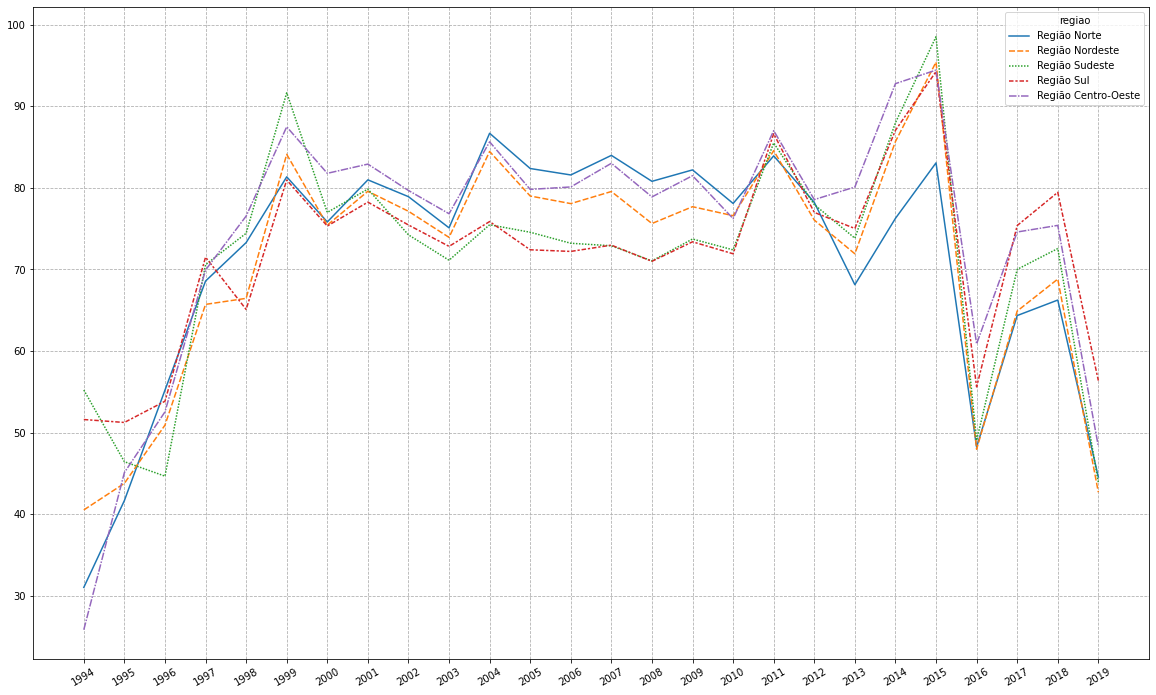

In [13]:
plt.figure(figsize=(20,12))
ax = sns.lineplot(data=cobertura_uf_regiao.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

Considerações do gráfico acima:
- A região norte estava indo super bem e de repente passou a ser a menor;
- A região sul seguiu o caminho contrário, figurava entre as piores e de repente ficou entre as melhores;
- A região sudeste não ia bem, mas teve o melhor pico de todo o gráfico e depois assumiu uma posição mediana;
- Todas as regiões seguem um comportamento parecido, tendo picos e quedas na mesma direção e intensidade.

O que nos traz à primeira pergunta: o que ocasionou a que da no gráfico? Por que as regiões estão atingindo menores índices de cobertura vacinal?

###Por Estado

Vamos plotar alguns estados de algumas regiões para ver mais de perto.

In [14]:
sudeste = ['Minas Gerais', 'Rio de Janeiro', 'São Paulo', 'Espírito Santo']
cobertura_uf_sudeste = cobertura_uf.query('uf in @sudeste')
sul = ['Rio Grande do Sul', 'Santa Catarina', 'Paraná']
cobertura_uf_sul = cobertura_uf.query('uf in @sul')
centro_oeste = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
cobertura_uf_centro_oeste = cobertura_uf.query('uf in @centro_oeste')
norte = ['Acre', 'Amazona', 'Roraima', 'Rondônia', 'Pará', 'Amapá', 'Tocantins']
cobertura_uf_norte = cobertura_uf.query('uf in @norte')
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']
cobertura_uf_nordeste = cobertura_uf.query('uf in @nordeste')

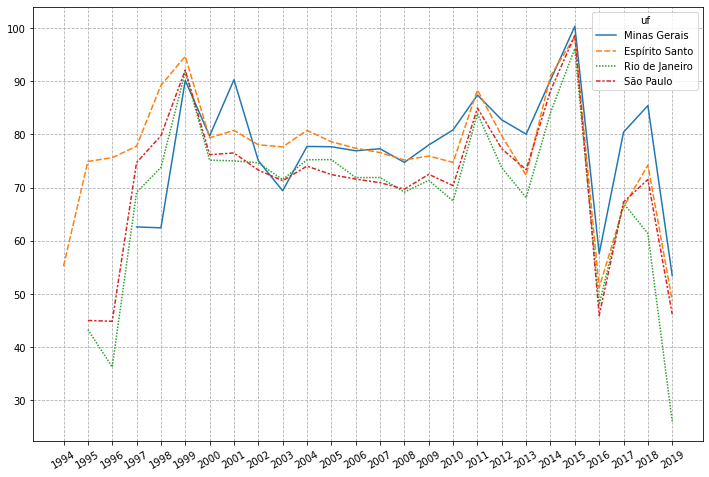

In [15]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_sudeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

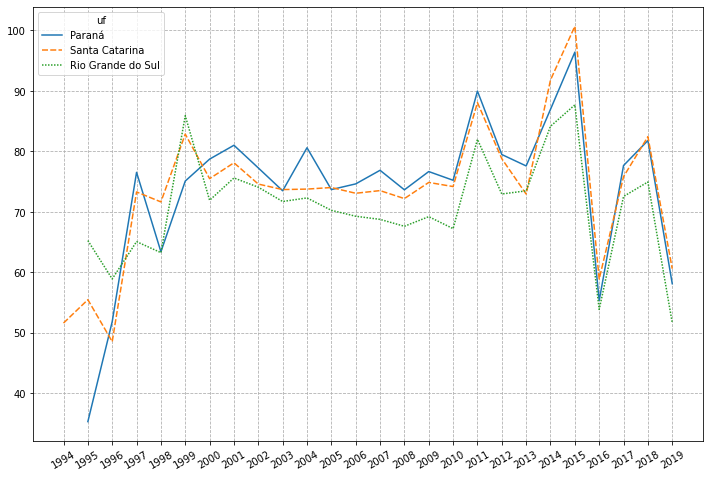

In [16]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_sul.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

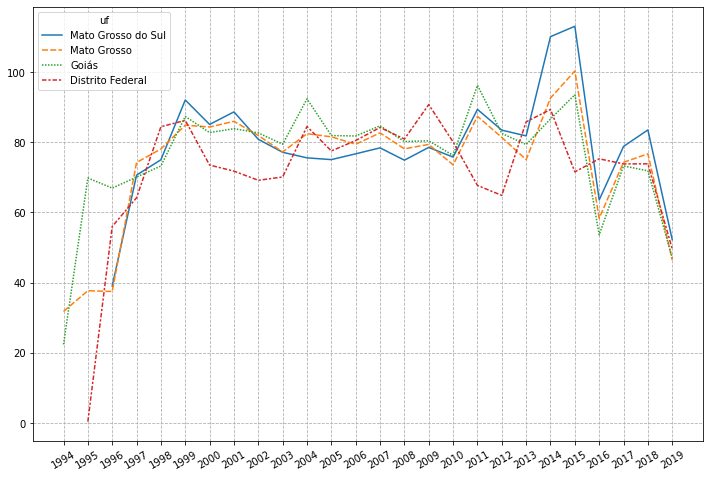

In [17]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_centro_oeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

#Essa região os estados parecem ter sofrido menos estabilidades nos últimos anos, apesar da queda continuar

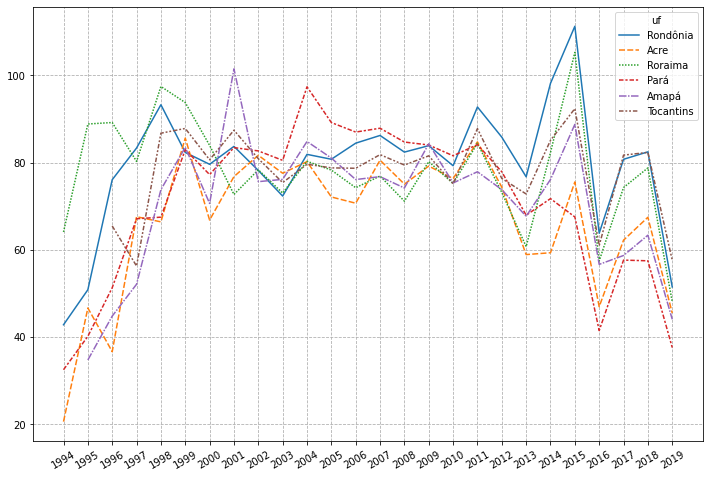

In [18]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_norte.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

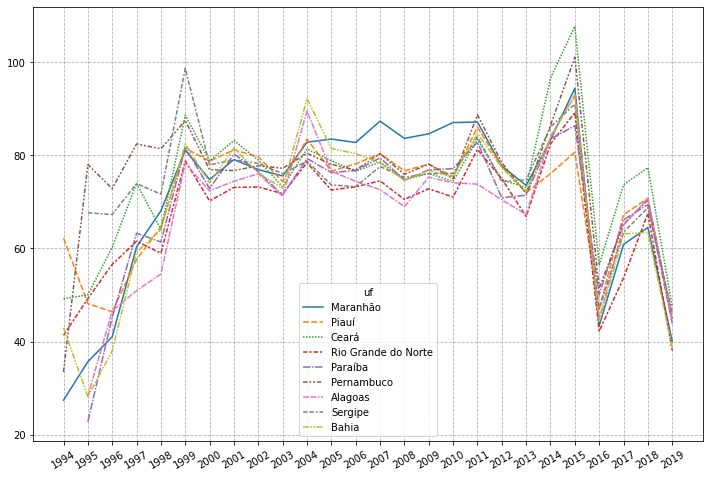

In [19]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_nordeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

Alguns insights vendo os gráficos:
- A região centro-oeste pareceu ter sido menos afetada pela queda de 2016, mesmo tendo sofrido a mesma queda de 2019 - principalmente o Distrito Federal
- O estado do Norte parece ser onde existe a maior variação de cobertura vacinal entre estados, talvez valha olhar os dados mais a fundo.

###Trabalhando as diferenças

Vou tentar fazer um dataframe que reflita as diferenças entre um ano e outro, assim teremos uma visão mais real sobre qual estado mudou mais ou menos no período.

####Estados

In [20]:
cobertura_uf_dif = cobertura_uf.diff(axis=1)
cobertura_uf_dif.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
uf,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,NaN,8.04,25.25,7.28,9.93,-10.95,-2.72,4.11,-5.52,-5.88,9.57,-1.12,3.69,1.77,-3.82,1.48,-4.61,13.49,-6.93,-9.10,21.46,13.09,-47.50,16.97,1.71,-31.01
Acre,NaN,26.08,-10.02,30.97,-1.18,19.23,-18.82,9.98,4.89,-4.12,2.67,-8.12,-1.43,9.88,-5.50,4.14,-2.86,8.42,-10.39,-15.48,0.42,16.25,-28.63,15.27,5.26,-22.00
Amazonas,NaN,15.67,14.06,22.13,-1.39,1.57,-1.28,-0.23,0.30,-6.21,7.37,1.53,1.14,4.03,-2.44,2.23,-5.33,6.79,-0.91,-12.12,10.08,17.81,-46.68,17.06,4.49,-19.85
Roraima,NaN,24.78,0.34,-8.92,17.19,-3.69,-9.82,-11.27,5.66,-5.34,7.29,-2.02,-4.04,2.68,-5.77,9.08,-5.02,9.23,-11.29,-12.43,21.60,22.97,-47.86,16.85,4.50,-30.72
Pará,NaN,7.67,11.15,15.83,0.37,15.49,-5.72,6.20,-0.77,-2.16,16.88,-8.21,-2.18,0.88,-3.17,-0.68,-2.47,2.56,-6.24,-9.96,3.80,-4.20,-26.08,16.17,-0.16,-19.91


Agora vou atribuir regiões a esse df também.

In [21]:
sudeste = ['Minas Gerais', 'Rio de Janeiro', 'São Paulo', 'Espírito Santo']
cobertura_uf_dif_sudeste = cobertura_uf_dif.query('uf in @sudeste')
sul = ['Rio Grande do Sul', 'Santa Catarina', 'Paraná']
cobertura_uf_dif_sul = cobertura_uf_dif.query('uf in @sul')
centro_oeste = ['Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal']
cobertura_uf_dif_centro_oeste = cobertura_uf_dif.query('uf in @centro_oeste')
norte = ['Acre', 'Amazona', 'Roraima', 'Rondônia', 'Pará', 'Amapá', 'Tocantins']
cobertura_uf_dif_norte = cobertura_uf_dif.query('uf in @norte')
nordeste = ['Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia']
cobertura_uf_dif_nordeste = cobertura_uf_dif.query('uf in @nordeste')

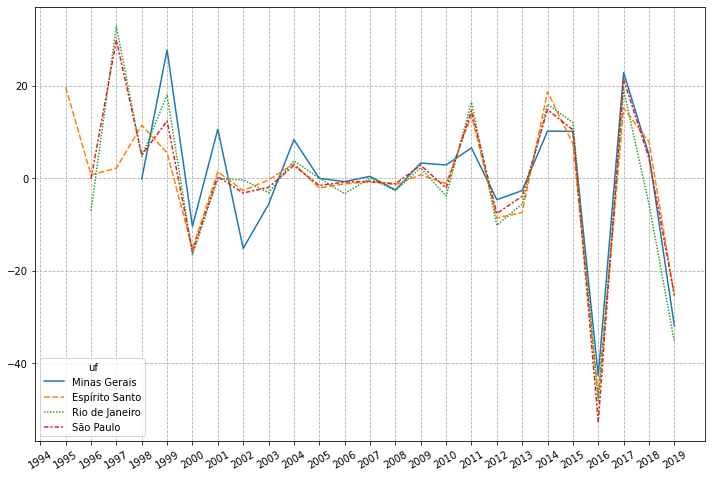

In [22]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_dif_sudeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

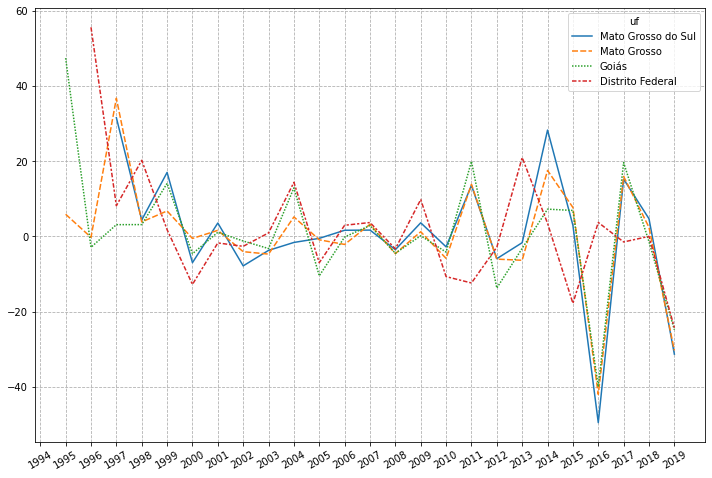

In [23]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_dif_centro_oeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

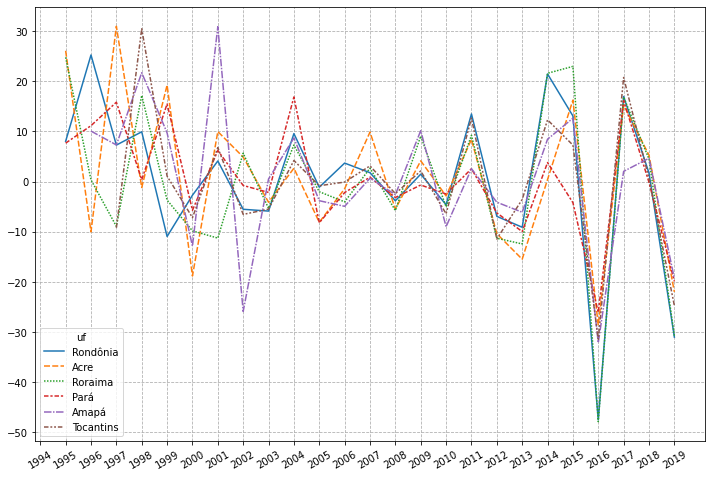

In [24]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_dif_norte.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

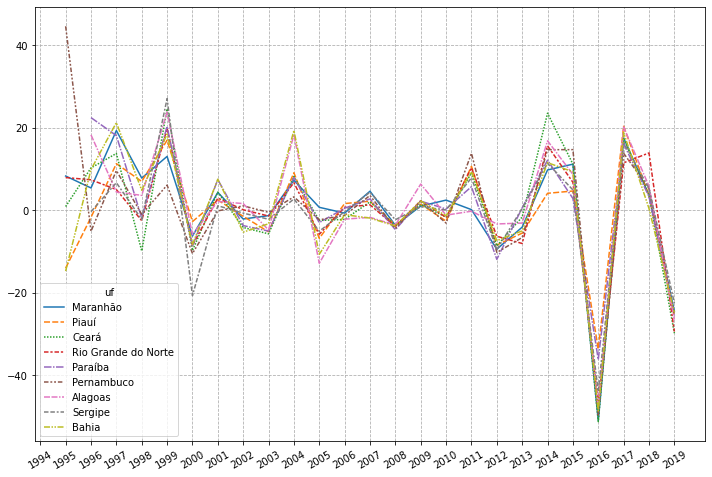

In [25]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_dif_nordeste.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

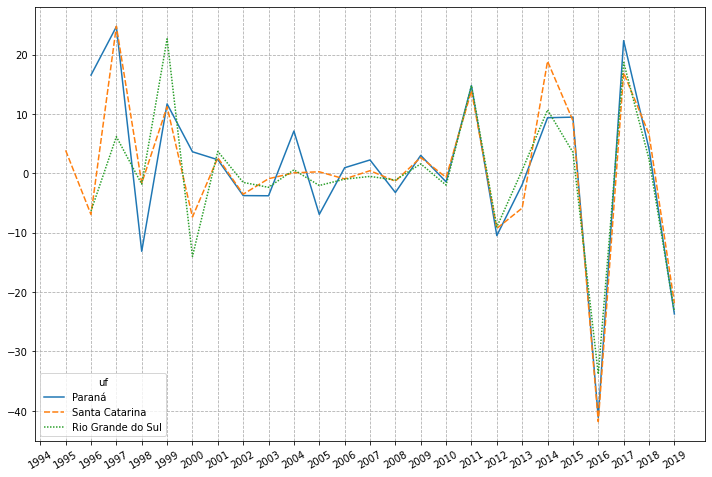

In [26]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_dif_sul.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

###Regiões

In [27]:
cobertura_uf_regiao_dif = cobertura_uf_regiao.diff(axis=1)
cobertura_uf_regiao_dif.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,NaN,10.64,13.53,13.37,4.71,8.06,-5.53,5.16,-2.06,-3.82,11.59,-4.32,-0.79,2.40,-3.18,1.40,-4.11,5.83,-5.70,-10.09,8.13,6.80,-34.83,16.12,1.90,-21.69
Região Nordeste,NaN,3.26,7.13,14.80,0.74,17.65,-8.68,4.15,-2.45,-3.20,10.53,-5.46,-0.93,1.48,-3.92,2.06,-1.10,7.97,-8.51,-4.13,13.75,9.74,-47.44,16.93,3.92,-26.12
Região Sudeste,NaN,-8.79,-1.77,25.92,3.84,17.22,-14.66,2.86,-5.61,-3.11,4.35,-0.92,-1.35,-0.31,-1.85,2.68,-1.33,13.11,-7.56,-4.12,14.15,10.54,-49.47,20.96,2.55,-28.67
Região Sul,NaN,-0.36,2.60,17.66,-6.41,15.86,-5.64,2.93,-2.80,-2.62,3.04,-3.46,-0.20,0.77,-1.98,2.39,-1.47,14.71,-9.64,-1.97,12.03,7.20,-38.64,19.77,4.07,-23.07
Região Centro-Oeste,NaN,19.26,7.44,17.38,6.61,10.94,-5.70,1.13,-3.23,-2.85,8.81,-5.83,0.30,2.90,-4.12,2.60,-5.26,10.78,-8.45,1.54,12.67,1.66,-33.55,13.71,0.81,-27.08


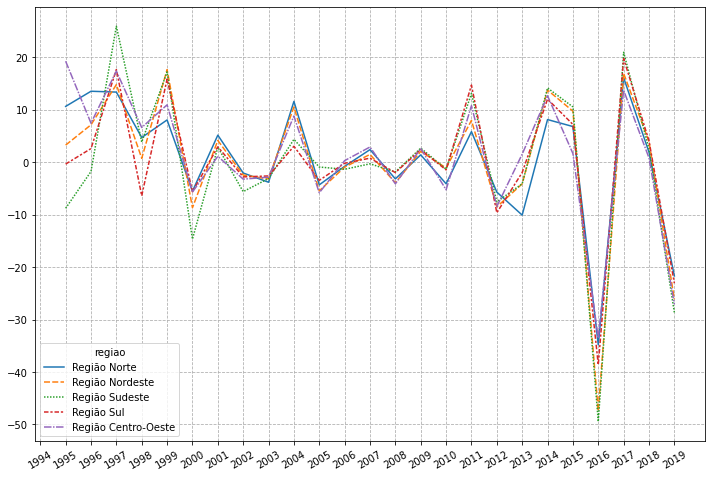

In [28]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=cobertura_uf_regiao_dif.T)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

O gráfico das regiões reflete perfeitamente os gráficos dos estados.

###Abrindo os dataframes para analisar ano a ano

In [29]:
cobertura_uf_regiao_aberto = cobertura_uf_regiao.T
cobertura_uf_regiao_aberto = cobertura_uf_regiao_aberto.reset_index().melt(id_vars=['index'], value_vars=cobertura_uf_regiao_aberto.columns)
cobertura_uf_regiao_aberto.columns = ['ano', 'regiao', 'cv']
cobertura_uf_regiao_aberto.head()

,ano,regiao,cv
0,1994,Região Norte,31.03
1,1995,Região Norte,41.67
2,1996,Região Norte,55.20
3,1997,Região Norte,68.57
4,1998,Região Norte,73.28


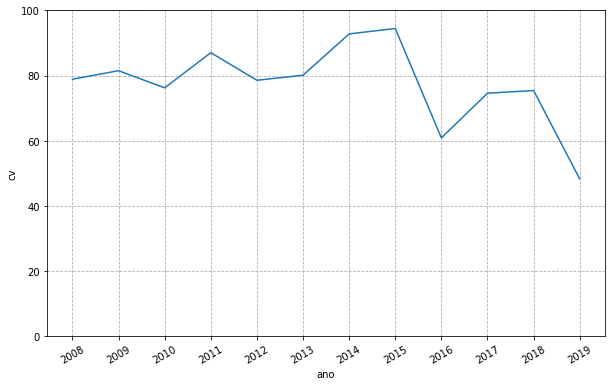

In [31]:
periodo = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=cobertura_uf_regiao_aberto.query("regiao=='Região Centro-Oeste'").query("ano in @periodo"), x='ano', y='cv', palette="tab10")
plt.xticks(rotation=30)
plt.ylim(0,100)
plt.grid(linestyle='--')
plt.show()

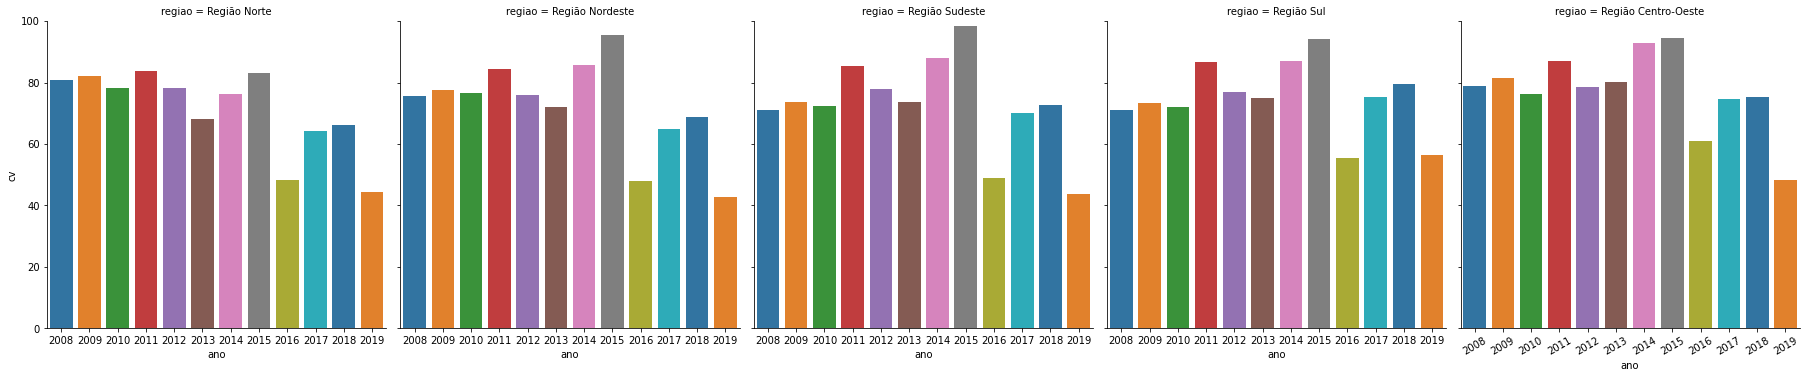

In [32]:
periodo = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

sns.catplot(data=cobertura_uf_regiao_aberto.query('ano in @periodo'), x='ano', y='cv', kind='bar', col='regiao', palette="tab10")
plt.xticks(rotation=30)
plt.ylim(0,100)
plt.show()

#realmente parece ter sido algo meio geral e que afetou 'por igual' todas as regiões.

##Abandono de tratamento das vacinas

##Dataframe do D(1):

In [33]:
comeco_tratamento = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 2 - Dados SUS/Desafio final/Abandono - Quantidade D1 por Anomês segundo Unidade Federação 94-20.csv', encoding='ISO-8859-1',
                                sep=';', skipfooter=1)
comeco_tratamento = comeco_tratamento.drop(labels=[' Total', 'Ignorado'], axis=1)
comeco_tratamento = comeco_tratamento.rename(columns={'Unidade Federação' : 'uf'})
comeco_tratamento = comeco_tratamento.set_index('uf', drop=True)
comeco_tratamento.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,2015/Jan,2015/Fev,2015/Mar,2015/Abr,2015/Mai,2015/Jun,2015/Jul,2015/Ago,2015/Set,2015/Out,2015/Nov,2015/Dez,2016/Jan,2016/Fev,2016/Mar,2016/Abr,2016/Mai,2016/Jun,2016/Jul,2016/Ago,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
uf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,478880,634641,908443,1545629,823168,755371,399015,351731,424262,587450,468841,372272,642368,437443,530394,395921,481893,416839,323563,382392,1090768,328207,342869,241430,503733,356670,537511,392776,559332,459391,471174,489619,1388668,534782,488679,359671,48998,28503,63919,81432,65151,48125,16299,17271,9314,8512,3540,3790,10788,12842,12073,15328,8336,11270,10236,4687,6942,9735,21498,10065
Alagoas,1014791,646141,2157870,1875189,1126613,835581,1078507,562789,1127935,1891956,1367656,772539,1167643,661709,791934,830110,864252,805989,947165,1095991,2771405,929690,998671,612930,1367723,847417,1281138,921039,1138209,926443,1483691,1828816,5762576,1776049,1428433,1076965,510279,343957,511763,604715,656122,346148,491253,552531,413580,323872,242165,184995,251441,252542,284975,433527,411909,268900,352537,392717,394739,350883,277532,110009
Amapá,232361,186234,389505,386551,396509,268604,230048,132085,284304,242757,220302,184133,235719,188903,239151,177914,168476,150093,209922,281325,753192,194250,168697,151267,223470,194048,312152,302044,342867,249183,314334,406381,2011681,390282,367841,305354,55785,47008,91386,88339,64896,32540,64691,98060,83283,83708,78849,28787,69573,50462,51942,65483,91513,35390,27349,65725,27976,42818,24092,25397
Amazonas,5396120,6057719,8757074,7578507,6991103,9839983,6497465,461178,6857056,6915375,6573763,5456340,8524192,6428247,7980406,7914523,8324065,7144983,6621325,13230029,32109737,6997751,7465083,5557395,11385430,7119094,11981124,8382540,8894983,7831666,10491053,10252211,31625361,8821279,8833355,7163183,2612215,937564,3643790,4137823,1777488,1770530,9635044,5547290,2037601,1271400,593094,631410,2293022,2244305,5841651,3481203,4927183,3785215,1347521,1151339,1151164,1142618,1029437,850703
Bahia,4504959,4311064,9253713,6491717,4940611,3919949,4650474,4986603,5825925,5155327,4640478,3731321,4554732,4110023,3261543,3158290,4628536,4280373,4514525,4518453,9333155,5473095,2858597,3057781,3174172,3036983,3089666,15366472,15459980,16826152,12884788,13321002,34258971,11073731,10007189,8022355,3183487,1017831,1537000,2271745,2029956,861675,1775658,1960306,3482061,1743331,828561,762745,1249414,771857,1145338,1696288,1897170,1454622,1204639,5162786,1951633,1682962,1085336,573540


##DataFrame do DN

##Clínicas básicas por uf de 2005 a 2019
- Conclusão: não é possível dizer que o número de cobertura vacinal caiu porque temos menos clinicas disponíveis. Na maioria das regiões o ano de 2016 não foi o ano com menor investimento dos últimos 5 anos (em alguns casos figurou entre os maiores).

###Criando e limpando o dataset

In [34]:
clinicas_basicas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp Data Science - Alura 2020/Módulo 2 - Dados SUS/Desafio final/Clínica Básica por Anomês compet. segundo RegiãoUnidade da Federação - 2005 - 2019.csv', encoding='ISO-8859-1',
                               sep=';', skiprows=3, skipfooter=9)
clinicas_basicas = clinicas_basicas.rename(columns={'Região/Unidade da Federação' : 'uf'})
clinicas_basicas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


,uf,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,2006/Jun,2006/Jul,2006/Ago,2006/Set,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
0,Região Norte,3318,3389,3394,3416,3426,3457,3489,3527,3560,3582,3576,3543,3624,3757,3798,3648,3844,3861,3896,3922,3945,4007,4041,4083,4104,4176,4189,4185,4206,4259,4280,4290,4330,4358,4403,4475,4526,4585,4661,...,7533,7549,7568,7486,7581,7604,7639,7654,7741,7664,7694,7768,7889,7944,7984,7951,8030,8074,8135,8163,8192,8224,8253,8291,8326,8390,8453,8502,8544,8605,8539,8589,8563,8573,8559,8627,8709,8763,8819,8794
1,.. Rondônia,261,264,280,294,288,293,293,303,311,311,312,313,320,327,327,324,329,331,349,355,358,361,363,383,386,392,379,364,368,375,377,384,397,398,401,408,409,420,425,...,1019,1023,1033,1030,1044,1044,1054,1059,1060,1057,1064,1061,1072,1074,1082,1071,1081,1087,1090,1096,1105,1104,1116,1145,1151,1161,1181,1186,1189,1210,1229,1233,1246,1238,1248,1244,1265,1276,1284,1245
2,.. Acre,190,193,189,188,188,195,196,198,204,204,207,210,210,216,216,196,217,217,221,221,224,227,227,229,228,227,225,229,235,234,235,235,236,224,232,224,234,238,241,...,410,410,412,414,414,423,425,427,428,425,426,432,430,430,431,429,429,430,431,431,431,432,432,435,434,436,432,433,438,440,442,447,455,454,462,489,500,509,508,503
3,.. Amazonas,914,960,961,965,968,971,988,1008,1011,1014,998,992,999,1013,1024,989,1033,1044,1028,1039,1060,1069,1067,1073,1076,1095,1101,1103,1105,1111,1111,1112,1113,1124,1124,1133,1134,1138,1139,...,1539,1545,1549,1493,1535,1541,1529,1493,1530,1473,1476,1478,1481,1488,1494,1492,1501,1507,1528,1529,1518,1520,1529,1520,1528,1543,1547,1551,1568,1577,1589,1610,1625,1553,1517,1530,1541,1554,1558,1566
4,.. Roraima,149,148,153,153,153,153,153,153,155,155,167,165,165,165,165,163,170,170,171,172,169,175,179,181,181,185,186,186,186,188,188,188,189,182,183,184,182,182,193,...,261,258,257,250,259,260,262,265,300,301,299,299,380,397,396,388,390,394,391,390,399,396,399,401,403,409,410,413,414,411,303,304,298,358,365,365,369,369,375,368
5,.. Pará,1386,1405,1397,1409,1427,1446,1460,1465,1478,1496,1505,1477,1546,1646,1674,1596,1698,1702,1721,1726,1723,1779,1813,1829,1835,1874,1895,1896,1909,1943,1957,1961,1970,1983,1999,2042,2071,2068,2103,...,3400,3405,3416,3407,3416,3421,3429,3432,3442,3441,3462,3517,3535,3548,3554,3575,3588,3604,3623,3638,3655,3675,3672,3682,3695,3714,3738,3762,3769,3791,3797,3806,3746,3777,3749,3779,3806,3824,3856,3868
6,.. Amapá,73,73,74,76,76,78,78,78,78,79,79,81,81,81,80,72,83,83,92,92,92,94,94,94,99,99,99,99,99,99,99,99,99,100,100,109,110,123,125,...,275,278,270,258,274,275,282,282,281,266,264,276,283,291,302,269,314,322,329,329,331,340,347,347,350,352,360,366,371,377,373,375,376,372,395,395,401,401,404,407
7,.. Tocantins,345,346,340,331,326,321,321,322,323,323,308,305,303,309,312,308,314,314,314,317,319,302,298,294,299,304,304,308,304,309,313,311,326,347,364,375,386,416,435,...,629,630,631,634,639,640,658,696,700,701,703,705,708,716,725,727,727,730,743,750,753,757,758,761,765,775,785,791,795,799,806,814,817,821,823,825,827,830,834,837
8,Região Nordeste,16404,16552,16671,16944,17094,15407,17518,17679,17889,18052,18167,18405,18617,18921,19130,18708,19458,19622,19898,20145,20285,20646,20769,20926,20980,21025,21142,21185,21266,21339,21369,21440,21524,21572,21722,21789,21874,21964,22010,...,29678,29730,29812,29862,29970,30049,30146,30251,30363,30441,30533,30689,30738,30792,30878,31030,31207,31327,31424,31557,31635,3170

In [35]:
clinicas_basicas_regiao = clinicas_basicas[clinicas_basicas['uf'].str.contains('Região')].reset_index(drop='True')
clinicas_basicas_regiao = clinicas_basicas_regiao.rename(columns={'uf':'regiao'})
clinicas_basicas_regiao = clinicas_basicas_regiao.set_index('regiao', drop=True)
clinicas_basicas_regiao = clinicas_basicas_regiao.astype(float)
clinicas_basicas_regiao

,2005/Ago,2005/Set,2005/Out,2005/Nov,2005/Dez,2006/Jan,2006/Fev,2006/Mar,2006/Abr,2006/Mai,2006/Jun,2006/Jul,2006/Ago,2006/Set,2006/Out,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2016/Set,2016/Out,2016/Nov,2016/Dez,2017/Jan,2017/Fev,2017/Mar,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,3318.0,3389.0,3394.0,3416.0,3426.0,3457.0,3489.0,3527.0,3560.0,3582.0,3576.0,3543.0,3624.0,3757.0,3798.0,3648.0,3844.0,3861.0,3896.0,3922.0,3945.0,4007.0,4041.0,4083.0,4104.0,4176.0,4189.0,4185.0,4206.0,4259.0,4280.0,4290.0,4330.0,4358.0,4403.0,4475.0,4526.0,4585.0,4661.0,4685.0,...,7533.0,7549.0,7568.0,7486.0,7581.0,7604.0,7639.0,7654.0,7741.0,7664.0,7694.0,7768.0,7889.0,7944.0,7984.0,7951.0,8030.0,8074.0,8135.0,8163.0,8192.0,8224.0,8253.0,8291.0,8326.0,8390.0,8453.0,8502.0,8544.0,8605.0,8539.0,8589.0,8563.0,8573.0,8559.0,8627.0,8709.0,8763.0,8819.0,8794.0
Região Nordeste,16404.0,16552.0,16671.0,16944.0,17094.0,15407.0,17518.0,17679.0,17889.0,18052.0,18167.0,18405.0,18617.0,18921.0,19130.0,18708.0,19458.0,19622.0,19898.0,20145.0,20285.0,20646.0,20769.0,20926.0,20980.0,21025.0,21142.0,21185.0,21266.0,21339.0,21369.0,21440.0,21524.0,21572.0,21722.0,21789.0,21874.0,21964.0,22010.0,22117.0,...,29678.0,29730.0,29812.0,29862.0,29970.0,30049.0,30146.0,30251.0,30363.0,30441.0,30533.0,30689.0,30738.0,30792.0,30878.0,31030.0,31207.0,31327.0,31424.0,31557.0,31635.0,31705.0,31790.0,31900.0,32028.0,32096.0,32118.0,32158.0,32211.0,32269.0,32339.0,32377.0,32488.0,32408.0,32540.0,32609.0,32709.0,32821.0,32903.0,32826.0
Região Sudeste,30275.0,30866.0,31549.0,31680.0,32614.0,33302.0,33789.0,34196.0,34688.0,34918.0,35286.0,34081.0,36347.0,36908.0,37364.0,35600.0,38458.0,38849.0,39234.0,39465.0,39458.0,39830.0,40053.0,40421.0,40663.0,40869.0,41094.0,41175.0,41337.0,41495.0,41691.0,41811.0,42120.0,42333.0,42593.0,42874.0,43257.0,43524.0,43833.0,44493.0,...,64199.0,64475.0,64831.0,65174.0,65504.0,65730.0,66155.0,66418.0,66746.0,67041.0,67398.0,67692.0,68235.0,68509.0,68764.0,69086.0,69599.0,69956.0,70182.0,70635.0,71160.0,71494.0,71908.0,72315.0,72787.0,73118.0,73374.0,73737.0,74082.0,74570.0,75211.0,75753.0,76331.0,76748.0,77359.0,77318.0,77936.0,78405.0,78745.0,78775.0
Região Sul,12221.0,12377.0,12487.0,12603.0,12738.0,12937.0,13093.0,13417.0,13657.0,13715.0,13969.0,6895.0,14561.0,14983.0,15161.0,14681.0,15498.0,15722.0,15944.0,16042.0,16207.0,16400.0,16485.0,16698.0,16889.0,16942.0,17048.0,17111.0,17136.0,17171.0,17240.0,17340.0,17430.0,17509.0,17674.0,17868.0,18001.0,18114.0,18238.0,18406.0,...,26579.0,26632.0,26699.0,26706.0,26797.0,26874.0,27053.0,27162.0,27297.0,27423.0,27608.0,27795.0,27885.0,28019.0,28113.0,28182.0,28254.0,28365.0,28465.0,28538.0,28616.0,28762.0,28887.0,29042.0,29151.0,29225.0,29362.0,29429.0,29525.0,29709.0,29828.0,29996.0,30117.0,30194.0,30357.0,30426.0,30612.0,30720.0,30840.0,30872.0
Região Centro-Oeste,5754.0,5813.0,5895.0,5906.0,5940.0,6000.0,6042.0,6140.0,6225.0,6264.0,6333.0,5551.0,6434.0,6519.0,6584.0,6351.0,6851.0,6879.0,6934.0,6987.0,7094.0,7153.0,7208.0,7251.0,7279.0,7293.0,7355.0,7374.0,7427.0,7424.0,7469.0,7501.0,7564.0,7575.0,7617.0,7643.0,7701.0,7767.0,7816.0,7879.0,...,10242.0,10267.0,10296.0,10111.0,9821.0,9280.0,8785.0,8859.0,8927.0,8972.0,9080.0,9134.0,9247.0,9333.0,9417.0,9477.0,9564.0,9668.0,9700.0,9832.0,9851.0,9879.0,9988.0,9830.0,9887.0,9943.0,9972.0,9983.0,10045.0,10135.0,10181.0,10264.0,10284.0,10277.0,10439.0,10343.0,10465.0,10540.0,10599.0,10532.0


In [36]:
clinicas_basicas_regiao.columns.str[5:]

Index(['Ago', 'Set', 'Out', 'Nov', 'Dez', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai',
       ...
       'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
      dtype='object', length=173)

In [37]:
meses = {
    'Jan' : 1,
    'Fev' : 2,
    'Mar' : 3,
    'Abr' : 4,
    'Mai' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Ago' : 8,
    'Set' : 9,
    'Out' : 10,
    'Nov' : 11,
    'Dez' : 12
}

def para_data(ano_mes):
  ano = int(ano_mes[:4])
  mes = ano_mes[5:]
  mes_numero = meses[mes]
  return date(ano,mes_numero,1)

clinicas_basicas_regiao.columns.map(para_data)

Index([2005-08-01, 2005-09-01, 2005-10-01, 2005-11-01, 2005-12-01, 2006-01-01,
       2006-02-01, 2006-03-01, 2006-04-01, 2006-05-01,
       ...
       2019-03-01, 2019-04-01, 2019-05-01, 2019-06-01, 2019-07-01, 2019-08-01,
       2019-09-01, 2019-10-01, 2019-11-01, 2019-12-01],
      dtype='object', length=173)

In [38]:
clinicas_basicas_regiao.columns = clinicas_basicas_regiao.columns.map(para_data)
clinicas_basicas_regiao.head()

,2005-08-01,2005-09-01,2005-10-01,2005-11-01,2005-12-01,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-01,2006-08-01,2006-09-01,2006-10-01,2006-11-01,2006-12-01,2007-01-01,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,2007-11-01,2007-12-01,2008-01-01,2008-02-01,2008-03-01,2008-04-01,2008-05-01,2008-06-01,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,...,2016-09-01,2016-10-01,2016-11-01,2016-12-01,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01
regiao,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,3318.0,3389.0,3394.0,3416.0,3426.0,3457.0,3489.0,3527.0,3560.0,3582.0,3576.0,3543.0,3624.0,3757.0,3798.0,3648.0,3844.0,3861.0,3896.0,3922.0,3945.0,4007.0,4041.0,4083.0,4104.0,4176.0,4189.0,4185.0,4206.0,4259.0,4280.0,4290.0,4330.0,4358.0,4403.0,4475.0,4526.0,4585.0,4661.0,4685.0,...,7533.0,7549.0,7568.0,7486.0,7581.0,7604.0,7639.0,7654.0,7741.0,7664.0,7694.0,7768.0,7889.0,7944.0,7984.0,7951.0,8030.0,8074.0,8135.0,8163.0,8192.0,8224.0,8253.0,8291.0,8326.0,8390.0,8453.0,8502.0,8544.0,8605.0,8539.0,8589.0,8563.0,8573.0,8559.0,8627.0,8709.0,8763.0,8819.0,8794.0
Região Nordeste,16404.0,16552.0,16671.0,16944.0,17094.0,15407.0,17518.0,17679.0,17889.0,18052.0,18167.0,18405.0,18617.0,18921.0,19130.0,18708.0,19458.0,19622.0,19898.0,20145.0,20285.0,20646.0,20769.0,20926.0,20980.0,21025.0,21142.0,21185.0,21266.0,21339.0,21369.0,21440.0,21524.0,21572.0,21722.0,21789.0,21874.0,21964.0,22010.0,22117.0,...,29678.0,29730.0,29812.0,29862.0,29970.0,30049.0,30146.0,30251.0,30363.0,30441.0,30533.0,30689.0,30738.0,30792.0,30878.0,31030.0,31207.0,31327.0,31424.0,31557.0,31635.0,31705.0,31790.0,31900.0,32028.0,32096.0,32118.0,32158.0,32211.0,32269.0,32339.0,32377.0,32488.0,32408.0,32540.0,32609.0,32709.0,32821.0,32903.0,32826.0
Região Sudeste,30275.0,30866.0,31549.0,31680.0,32614.0,33302.0,33789.0,34196.0,34688.0,34918.0,35286.0,34081.0,36347.0,36908.0,37364.0,35600.0,38458.0,38849.0,39234.0,39465.0,39458.0,39830.0,40053.0,40421.0,40663.0,40869.0,41094.0,41175.0,41337.0,41495.0,41691.0,41811.0,42120.0,42333.0,42593.0,42874.0,43257.0,43524.0,43833.0,44493.0,...,64199.0,64475.0,64831.0,65174.0,65504.0,65730.0,66155.0,66418.0,66746.0,67041.0,67398.0,67692.0,68235.0,68509.0,68764.0,69086.0,69599.0,69956.0,70182.0,70635.0,71160.0,71494.0,71908.0,72315.0,72787.0,73118.0,73374.0,73737.0,74082.0,74570.0,75211.0,75753.0,76331.0,76748.0,77359.0,77318.0,77936.0,78405.0,78745.0,78775.0
Região Sul,12221.0,12377.0,12487.0,12603.0,12738.0,12937.0,13093.0,13417.0,13657.0,13715.0,13969.0,6895.0,14561.0,14983.0,15161.0,14681.0,15498.0,15722.0,15944.0,16042.0,16207.0,16400.0,16485.0,16698.0,16889.0,16942.0,17048.0,17111.0,17136.0,17171.0,17240.0,17340.0,17430.0,17509.0,17674.0,17868.0,18001.0,18114.0,18238.0,18406.0,...,26579.0,26632.0,26699.0,26706.0,26797.0,26874.0,27053.0,27162.0,27297.0,27423.0,27608.0,27795.0,27885.0,28019.0,28113.0,28182.0,28254.0,28365.0,28465.0,28538.0,28616.0,28762.0,28887.0,29042.0,29151.0,29225.0,29362.0,29429.0,29525.0,29709.0,29828.0,29996.0,30117.0,30194.0,30357.0,30426.0,30612.0,30720.0,30840.0,30872.0
Região Centro-Oeste,5754.0,5813.0,5895.0,5906.0,5940.0,6000.0,6042.0,6140.0,6225.0,6264.0,6333.0,5551.0,6434.0,6519.0,6584.0,6351.0,6851.0,6879.0,6934.0,6987.0,7094.0,7153.0,7208.0,7251.0,7279.0,7293.0,7355.0,7374.0,7427.0,7424.0,7469.0,7501.0,7564.0,7575.0,7617.0,7643.0,7701.0,7767.0,7816.0,7879.0,...,10242.0,10267.0,10296.0,10111.0,9821.0,9280.0,8785.0,8859.0,8927.0,8972.0,9080.0,9134.0,9247.0,9333.0,9417.0,9477.0,9564.0,9668.0,9700.0,9832.0,9851.0,9879.0,9988.0,9830.0,9

###Fazendo alguns plots

In [39]:
clinicas_basicas_regiao_mensal = clinicas_basicas_regiao.T

Plotando o total

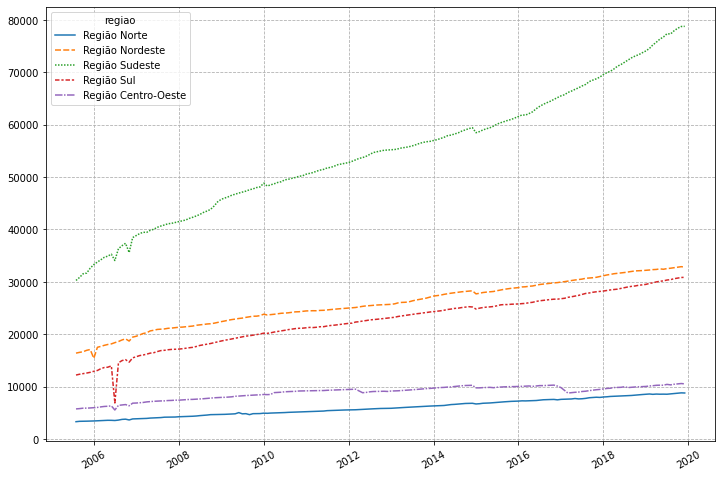

In [40]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal)
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

#possível notar que apenas a região centro-oeste viu uma queda no investimento

Plotando as diferenças

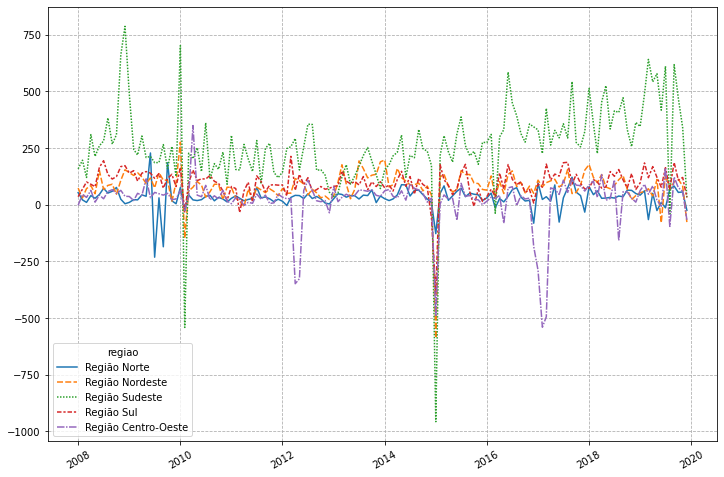

In [41]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal[28:].diff(axis=0))
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

#possível notar que apenas a região centro-oeste viu uma queda no investimento

Abrindo o dataframe

In [42]:
clinicas_basicas_regiao_mensal.index[0]

datetime.date(2005, 8, 1)

In [43]:
clinicas_basicas_regiao_mensal_aberto = clinicas_basicas_regiao_mensal.reset_index().melt(id_vars=['index'], value_vars=clinicas_basicas_regiao_mensal.columns)
clinicas_basicas_regiao_mensal_aberto.columns = ['dia_mes_ano', 'regiao', 'clinicas']
clinicas_basicas_regiao_mensal_aberto['dia_mes_ano'] = clinicas_basicas_regiao_mensal_aberto['dia_mes_ano'].astype('datetime64')
clinicas_basicas_regiao_mensal_aberto.head()

,dia_mes_ano,regiao,clinicas
0,2005-08-01,Região Norte,3318.0
1,2005-09-01,Região Norte,3389.0
2,2005-10-01,Região Norte,3394.0
3,2005-11-01,Região Norte,3416.0
4,2005-12-01,Região Norte,3426.0


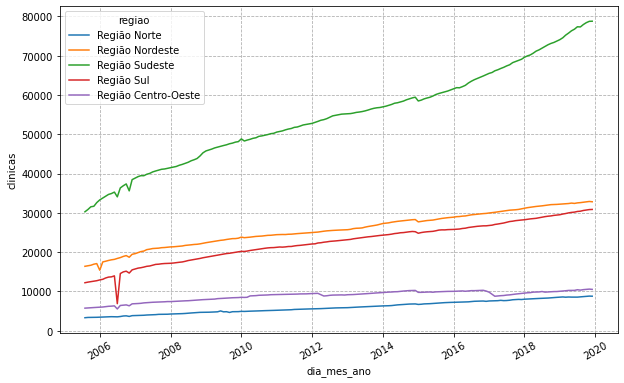

In [44]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto, x='dia_mes_ano', y='clinicas', hue='regiao')
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

In [45]:
clinicas_basicas_regiao_mensal_aberto['mes'] = clinicas_basicas_regiao_mensal_aberto['dia_mes_ano'].dt.month
clinicas_basicas_regiao_mensal_aberto['ano'] = clinicas_basicas_regiao_mensal_aberto['dia_mes_ano'].dt.year

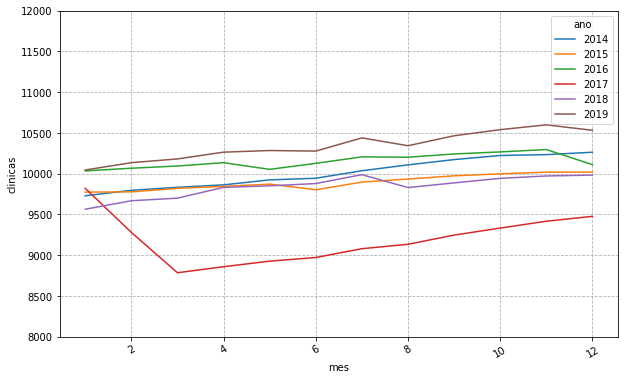

In [46]:
periodo = ['2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto.query("regiao=='Região Centro-Oeste'").query("ano in @periodo"), x='mes', y='clinicas', hue='ano', palette="tab10")
plt.xticks(rotation=30)
plt.ylim(8000,12000)
plt.grid(linestyle='--')
plt.show()

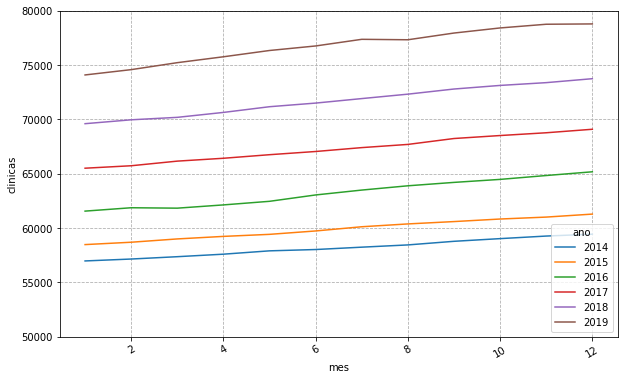

In [47]:
periodo = ['2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto.query("regiao=='Região Sudeste'").query("ano in @periodo"), x='mes', y='clinicas', hue='ano', palette="tab10")
plt.xticks(rotation=30)
plt.ylim(50000,80000)
plt.grid(linestyle='--')
plt.show()

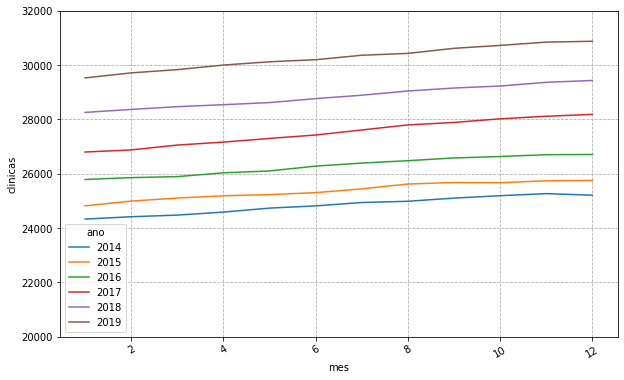

In [48]:
periodo = ['2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto.query("regiao=='Região Sul'").query("ano in @periodo"), x='mes', y='clinicas', hue='ano', palette="tab10")
plt.xticks(rotation=30)
plt.ylim(20000,32000)
plt.grid(linestyle='--')
plt.show()

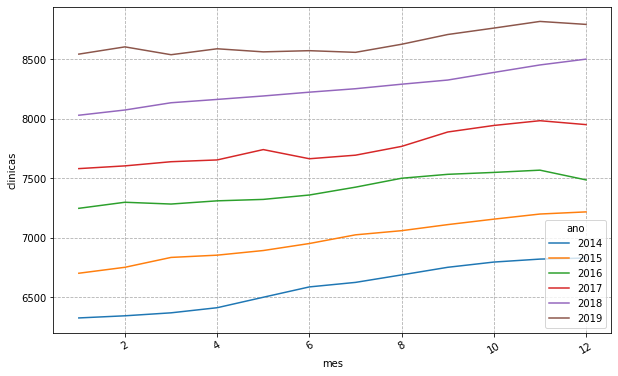

In [49]:
periodo = ['2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto.query("regiao=='Região Norte'").query("ano in @periodo"), x='mes', y='clinicas', hue='ano', palette="tab10")
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()

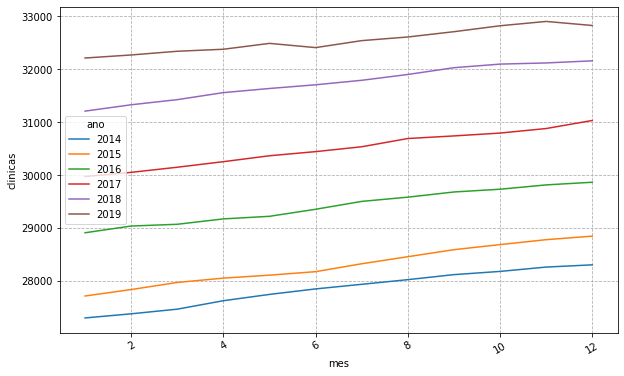

In [50]:
periodo = ['2014', '2015', '2016', '2017', '2018', '2019']

plt.figure(figsize=(10,6))
ax = sns.lineplot(data=clinicas_basicas_regiao_mensal_aberto.query("regiao=='Região Nordeste'").query("ano in @periodo"), x='mes', y='clinicas', hue='ano', palette="tab10")
plt.xticks(rotation=30)
plt.grid(linestyle='--')
plt.show()